# Análise da Desigualdade Regional na Educação (vs. Média Nacional por Nível)

Este notebook expande a análise anterior, adicionando a média nacional como referência não apenas no gráfico geral, mas também na evolução temporal de cada nível de ensino.


 - **Preparação para Análise por Nível:** Consolidação dos dados do Sudeste, Nordeste e da Média Brasil.
 - **Visualização Focada com Média por Nível:** Comparação detalhada da evolução das regiões extremas contra a média nacional para cada nível de ensino.

### 1. Configuração e Carga dos Dados

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_white"

df = pd.read_excel('dados_consolidados.xlsx')

df.columns = df.columns.str.strip()
df['regiao'] = df['regiao'].str.strip()

df.head()

,regiao,grupo,pop_total,taxa_concluiu_pct,pop_homens,taxa_concluiu_homens_pct,pop_mulheres,taxa_concluiu_mulheres_pct,ano,nivel
0,Brasil,Todas,9142,89.8,4620,87.5,4522,92.1,2022,fundamental
1,Norte,Todas,1001,85.0,514,82.7,487,87.4,2022,fundamental
2,Nordeste,Todas,2743,85.3,1378,81.7,1365,88.9,2022,fundamental
3,Sudeste,Todas,3473,93.5,1760,92.2,1713,94.8,2022,fundamental
4,Sul,Todas,1171,91.8,590,89.7,581,93.9,2022,fundamental


### 2. Preparação dos Dados

In [ ]:
df_todas = df[df['grupo'] == 'Todas'].copy()

### 3. Cálculo da Média Geral e Visualização Macro

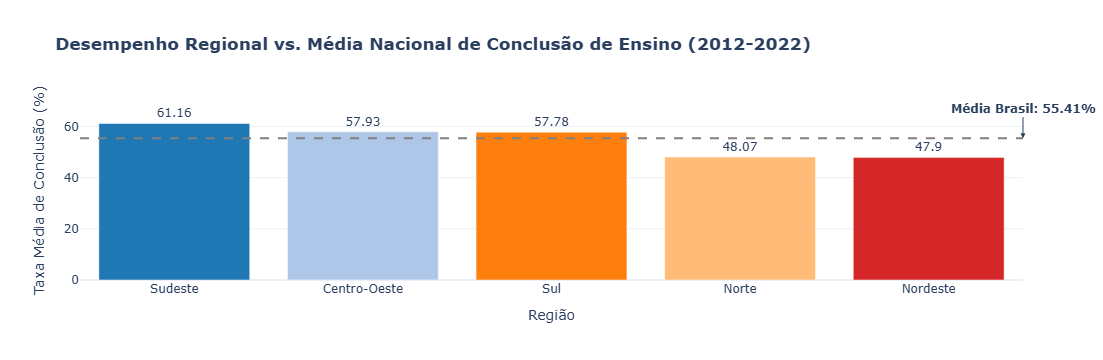

In [ ]:
media_geral = df_todas.groupby('regiao')['taxa_concluiu_pct'].mean().reset_index()

# Adicionamos uma verificação para garantir que 'Brasil' existe antes de tentar acessá-lo
if 'Brasil' not in media_geral['regiao'].values:
    raise ValueError("A região 'Brasil' não foi encontrada. Verifique o arquivo por espaços extras ou erros de digitação.")

media_brasil = media_geral.loc[media_geral['regiao'] == 'Brasil', 'taxa_concluiu_pct'].iloc[0]
media_regioes = media_geral[media_geral['regiao'] != 'Brasil'].sort_values(by='taxa_concluiu_pct', ascending=False)
media_regioes['taxa_concluiu_pct'] = media_regioes['taxa_concluiu_pct'].round(2)

fig_bar = go.Figure()
fig_bar.add_trace(go.Bar(
    x=media_regioes['regiao'], y=media_regioes['taxa_concluiu_pct'],
    text=media_regioes['taxa_concluiu_pct'], textposition='outside',
    name='Média Regional',
    marker_color=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#d62728']
))
fig_bar.add_hline(y=media_brasil, line_dash="dash", line_color="gray")

fig_bar.add_annotation(
    x=1, y=media_brasil,
    xref="paper", yref="y",
    text=f"<b>Média Brasil: {media_brasil:.2f}%</b>",
    showarrow=True, arrowhead=2, ax=0, ay=-30
)


fig_bar.update_layout(
    title_text='<b>Desempenho Regional vs. Média Nacional de Conclusão de Ensino (2012-2022)</b>',
    xaxis_title='Região', yaxis_title='Taxa Média de Conclusão (%)', showlegend=False,
    yaxis=dict(range=[0, media_regioes['taxa_concluiu_pct'].max() * 1.15])
)
fig_bar.show()

### 4. Preparação para Análise por Nível

Para adicionar a linha da média do Brasil ao gráfico de evolução, vamos criar um DataFrame combinado. Ele conterá os dados do Sudeste, do Nordeste e também os dados do Brasil, que serão usados como nossa linha de referência.

In [ ]:
# 1. Isola os dados das regiões de interesse
df_ne_se = df_todas[df_todas['regiao'].isin(['Nordeste', 'Sudeste'])].copy()

# 2. Isola os dados do Brasil e renomeia a 'regiao' para criar uma nova categoria para o gráfico
df_brasil_media = df_todas[df_todas['regiao'] == 'Brasil'].copy()
df_brasil_media['regiao'] = 'Média Brasil'

# 3. Concatena os três DataFrames em um só
df_plot_final = pd.concat([df_ne_se, df_brasil_media])

df_plot_final.sample(5) # Mostra 5 linhas aleatórias para verificação

,regiao,grupo,pop_total,taxa_concluiu_pct,pop_homens,taxa_concluiu_homens_pct,pop_mulheres,taxa_concluiu_mulheres_pct,ano,nivel
147,Sudeste,Todas,3956,85.6,1986,82.2,1970,89.1,2012,fundamental
324,Média Brasil,Todas,10437,15.2,5138,11.8,5299,18.4,2012,superior
165,Sudeste,Todas,4176,65.3,2133,60.1,2044,70.7,2012,medio
219,Sudeste,Todas,4262,68.1,2157,62.0,2105,74.4,2015,medio
378,Média Brasil,Todas,10535,17.5,5300,14.8,5235,20.3,2015,superior


### 5. Visualização Focada com Média por Nível

Gráfico de evolução comparando Sudeste e Nordeste, incluindo a linha de referência da Média Brasil para cada nível de ensino.

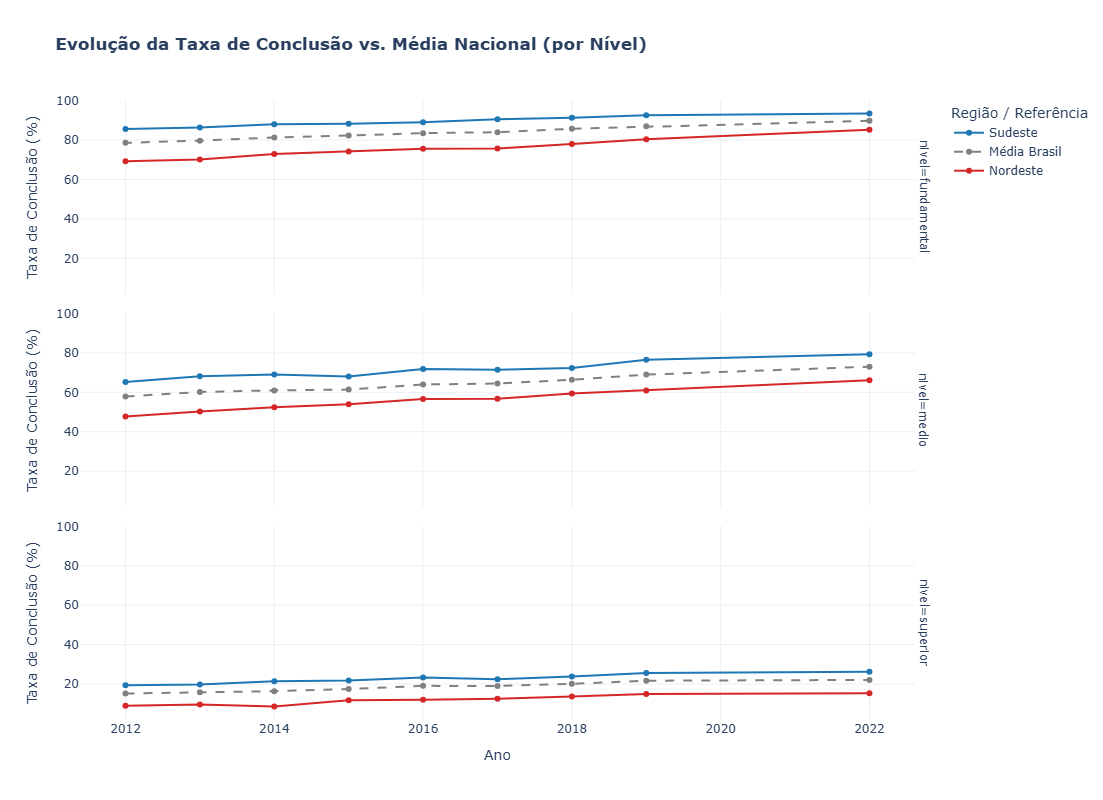

In [ ]:
fig_evolucao_com_media = px.line(
    df_plot_final,
    x='ano',
    y='taxa_concluiu_pct',
    color='regiao',          # Agora contém 'Nordeste', 'Sudeste' e 'Média Brasil'
    line_dash='regiao',        # Define o estilo da linha com base na mesma coluna
    facet_row='nivel',
    title='<b>Evolução da Taxa de Conclusão vs. Média Nacional (por Nível)</b>',
    labels={'ano': 'Ano', 'taxa_concluiu_pct': 'Taxa de Conclusão (%)', 'regiao': 'Região / Referência'},
    markers=True,
    # Define a ordem para a legenda e para os subplots
    category_orders={
        "nivel": ["fundamental", "medio", "superior"],
        "regiao": ["Sudeste", "Média Brasil", "Nordeste"]
    },
    # Mapeia cores específicas para cada categoria
    color_discrete_map={
        'Sudeste': '#1f77b4',
        'Nordeste': '#d62728',
        'Média Brasil': 'gray'
    },
    # Mapeia estilos de linha específicos
    line_dash_map={
        'Sudeste': 'solid',
        'Nordeste': 'solid',
        'Média Brasil': 'dash'
    }
)

fig_evolucao_com_media.update_layout(height=800)
fig_evolucao_com_media.show()